<div align="center">
  <h1 style="font-size: 50px; font-weight: bold; color: ##3fb5a9; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); border: 2px solid ##3fb5a9; padding: 10px;">
    Association Rules
  </h1>
  <img src="https://annalyzin.files.wordpress.com/2016/04/association-rules-network-graph2.png?w=996&h=843" alt="Association Rules Network Graph" style="max-width: 40%; height: auto;">
</div>


<h2 style="font-size: 24px; font-weight: bold; color: #336699; margin-top: 20px;">
  Import Libraries
</h2>


In [1]:
# CÓDIGO E DADOS ORIGINAIS: 
# https://www.kaggle.com/datasets/rukenmissonnier/real-market-data
#https://www.kaggle.com/code/rukenmissonnier/apriori-algorithm
# adaptação: H.S.Lopes 2024
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
#df = pd.read_csv("/kaggle/input/real-market-data/market.csv",sep=";")
df=pd.read_csv("mercado.csv",sep=";")

<h2 style="font-size: 24px; font-weight: bold; color: #336699; margin-top: 20px;">
  EDA
</h2>


In [3]:
df.head()

,Pao,Mel,Bacon,Pastadedente,Banana,Maca,Avela,Queijo,Carne,Cenoura,...,Leite,Manteiga,CremeBarbear,Sal,Farinha,CremedeLeite,Ovos,Azeitonas,Shampoo,Acucar
0,1,0,1,0,1,1,1,0,0,1,...,0,0,0,0,0,1,1,0,0,1
1,1,1,1,0,1,1,1,0,0,0,...,1,1,0,0,1,0,0,1,1,0
2,0,1,1,1,1,1,1,1,1,0,...,1,0,1,1,1,1,1,0,0,1
3,1,1,0,1,0,1,0,0,0,0,...,1,0,0,0,1,0,1,1,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464 entries, 0 to 463
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Pao           464 non-null    int64
 1   Mel           464 non-null    int64
 2   Bacon         464 non-null    int64
 3   Pastadedente  464 non-null    int64
 4   Banana        464 non-null    int64
 5   Maca          464 non-null    int64
 6   Avela         464 non-null    int64
 7   Queijo        464 non-null    int64
 8   Carne         464 non-null    int64
 9   Cenoura       464 non-null    int64
 10  Pepino        464 non-null    int64
 11  Cebola        464 non-null    int64
 12  Leite         464 non-null    int64
 13  Manteiga      464 non-null    int64
 14  CremeBarbear  464 non-null    int64
 15  Sal           464 non-null    int64
 16  Farinha       464 non-null    int64
 17  CremedeLeite  464 non-null    int64
 18  Ovos          464 non-null    int64
 19  Azeitonas     464 non-null   

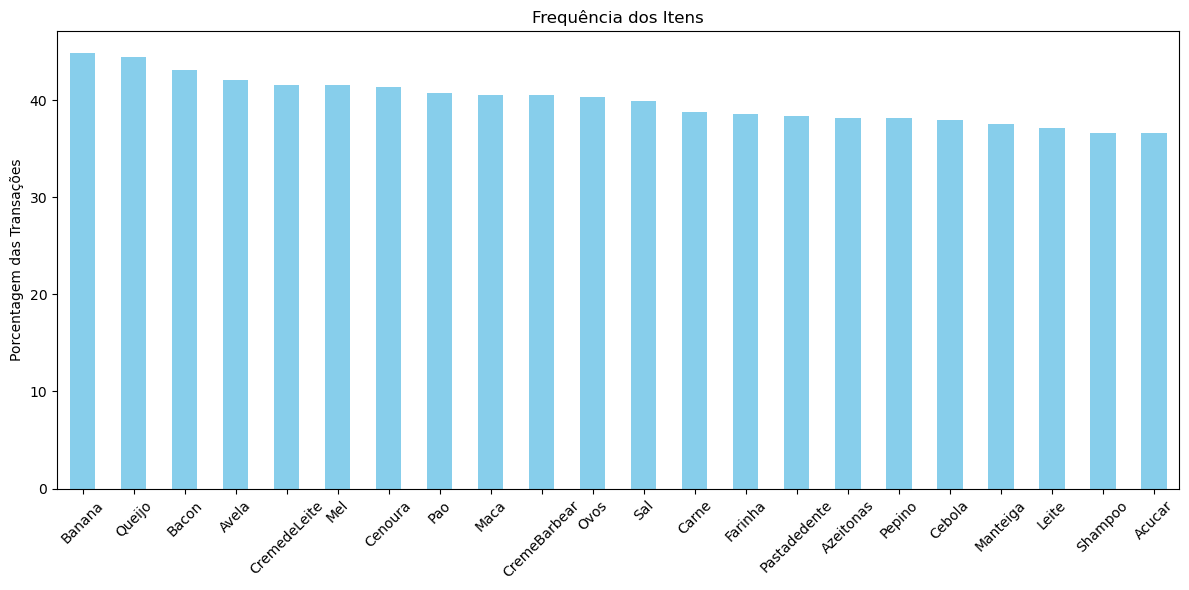

In [5]:
# Calculate itemset frequency (percentage of transactions where each item was purchased)
itemset_frequency = df.mean() * 100

# Create a bar plot
plt.figure(figsize=(12, 6))
itemset_frequency.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Frequência dos Itens')
plt.ylabel('Porcentagem das Transações')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
# Calculate the size of each itemset (number of items in each transaction)
itemset_sizes = df.sum(axis=1)

# Create a DataFrame for the histogram data
histogram_data = pd.DataFrame({'Itemset Size': itemset_sizes})

# Create an interactive histogram using Plotly Express
fig = px.histogram(histogram_data, x='Itemset Size', nbins=max(itemset_sizes), labels={'Itemset Size': 'Number of Items in Transaction'})
fig.update_layout(
    title='Distribuição do tamanho dos conjuntos de itens (tamanho das cestas)',
    xaxis_title='Numero de itens na transação',
    yaxis_title='Frequência',
    xaxis=dict(showline=True, showgrid=False),
    yaxis=dict(showline=True, showgrid=True, gridwidth=0.5, gridcolor='lightgray'),
    bargap=0.05  # Adjust the gap between bars
)

fig.show()

c:\ProgramData\anaconda3\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

c:\ProgramData\anaconda3\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



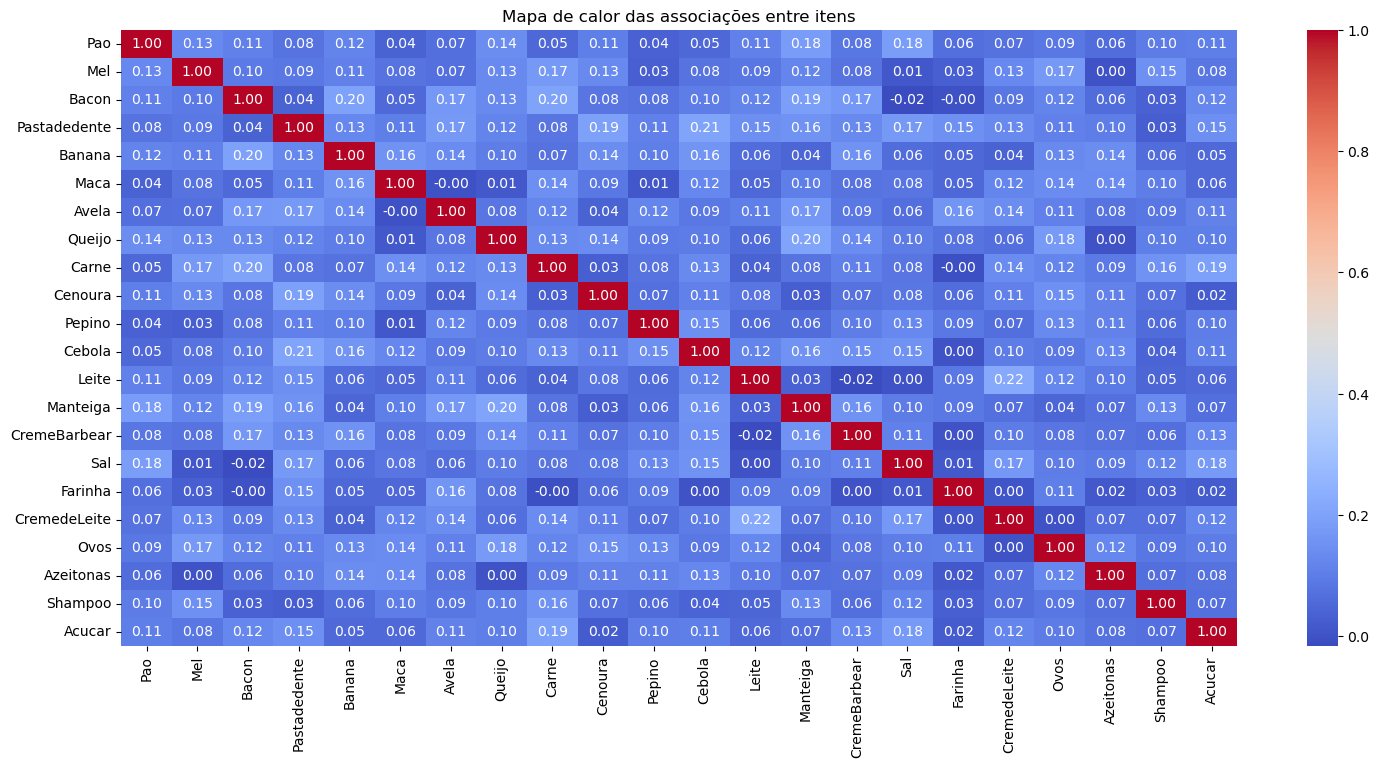

In [13]:
# Create a correlation heatmap to visualize item associations
item_associations = df.corr()
plt.figure(figsize=(18, 8))
sns.heatmap(item_associations, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Mapa de calor das associações entre itens')
plt.show()

In [14]:
def biprint(text):
    bold, italic,reset= "\033[1m","\033[3m","\033[0m"
    formatted_text = f"{bold}{italic}{text}{reset}"
    print(formatted_text)

<h2 style="font-size: 24px; font-weight: bold; color: #336699; margin-top: 20px;">
Frequently purchased items</h2>


In [23]:
min_support=0.2
frequently_bought = apriori(df, min_support, use_colnames=True, verbose=1)
biprint(f"Considerando o suporte mínimo de: {min_support} ")
biprint(f"O número de itens comprados frequentemente com suporte mínimo é: {len(frequently_bought)}")

Processing 1014 combinations | Sampling itemset size 3
Considerando o suporte mínimo de: 0.2 
O número de itens comprados frequentemente com suporte mínimo é: 66


C:\Users\hslop\AppData\Roaming\Python\Python310\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



In [24]:
frequently_bought

,support,itemsets
0,0.407328,(Pao)
1,0.415948,(Mel)
2,0.431034,(Bacon)
3,0.383621,(Pastadedente)
4,0.448276,(Banana)
...,...,...
61,0.200431,"(CremedeLeite, Queijo)"
62,0.221983,"(Queijo, Ovos)"
63,0.202586,"(Ovos, Cenoura)"
64,0.206897,"(CremedeLeite, Leite)"


<h2 style="font-size: 24px; font-weight: bold; color: #336699; margin-top: 20px;">
Rules</h2>


In [29]:
rules = association_rules(frequently_bought, metric = "confidence", min_threshold = 0.5)
biprint(f"O número de regras encontrado foi = {len(rules)}")

O número de regras encontrado foi = 45


In [26]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Pao),(Banana),0.407328,0.448276,0.211207,0.518519,1.156695,0.028612,1.145889,0.228571
1,(Pao),(Queijo),0.407328,0.443966,0.215517,0.529101,1.191760,0.034678,1.180792,0.271491
2,(Pao),(Sal),0.407328,0.398707,0.206897,0.507937,1.273960,0.044492,1.221983,0.362841
3,(Sal),(Pao),0.398707,0.407328,0.206897,0.518919,1.273960,0.044492,1.231960,0.357639
4,(Mel),(Banana),0.415948,0.448276,0.213362,0.512953,1.144281,0.026902,1.132795,0.215886
5,(Mel),(Queijo),0.415948,0.443966,0.217672,0.523316,1.178731,0.033006,1.166464,0.259618
6,(Carne),(Mel),0.387931,0.415948,0.202586,0.522222,1.255498,0.041227,1.222434,0.332484
7,(Mel),(Ovos),0.415948,0.403017,0.209052,0.502591,1.247070,0.041417,1.200184,0.339217
8,(Ovos),(Mel),0.403017,0.415948,0.209052,0.518717,1.247070,0.041417,1.213530,0.331869
9,(Banana),(Bacon),0.448276,0.431034,0.241379,0.538462,1.249231,0.048157,1.232759,0.361607


In [39]:
min_threshold = 1.3
lift = association_rules(frequently_bought, metric = "lift", min_threshold=1.3)
biprint(f"O valor mínimo de lift é = {lift_min_threshold}")
biprint(f"O número de regras de associação para este valor de lift é = {len(rules)}")

O valor mínimo de lift é = 1.3
O número de regras de associação para este valor de lift é = 45


In [ ]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Bread),(Banana),0.407328,0.448276,0.211207,0.518519,1.156695,0.028612,1.145889,0.228571
1,(Bread),(Cheese),0.407328,0.443966,0.215517,0.529101,1.191760,0.034678,1.180792,0.271491
2,(Salt),(Bread),0.398707,0.407328,0.206897,0.518919,1.273960,0.044492,1.231960,0.357639
3,(Bread),(Salt),0.407328,0.398707,0.206897,0.507937,1.273960,0.044492,1.221983,0.362841
4,(Honey),(Banana),0.415948,0.448276,0.213362,0.512953,1.144281,0.026902,1.132795,0.215886
5,(Honey),(Cheese),0.415948,0.443966,0.217672,0.523316,1.178731,0.033006,1.166464,0.259618
6,(Meat),(Honey),0.387931,0.415948,0.202586,0.522222,1.255498,0.041227,1.222434,0.332484
7,(Honey),(Egg),0.415948,0.403017,0.209052,0.502591,1.247070,0.041417,1.200184,0.339217
8,(Egg),(Honey),0.403017,0.415948,0.209052,0.518717,1.247070,0.041417,1.213530,0.331869
9,(Bacon),(Banana),0.431034,0.448276,0.241379,0.560000,1.249231,0.048157,1.253918,0.350649


<h2 style="font-size: 24px; font-weight: bold; color: #336699; margin-top: 20px;">
Confidence - Lift - Support </h2>


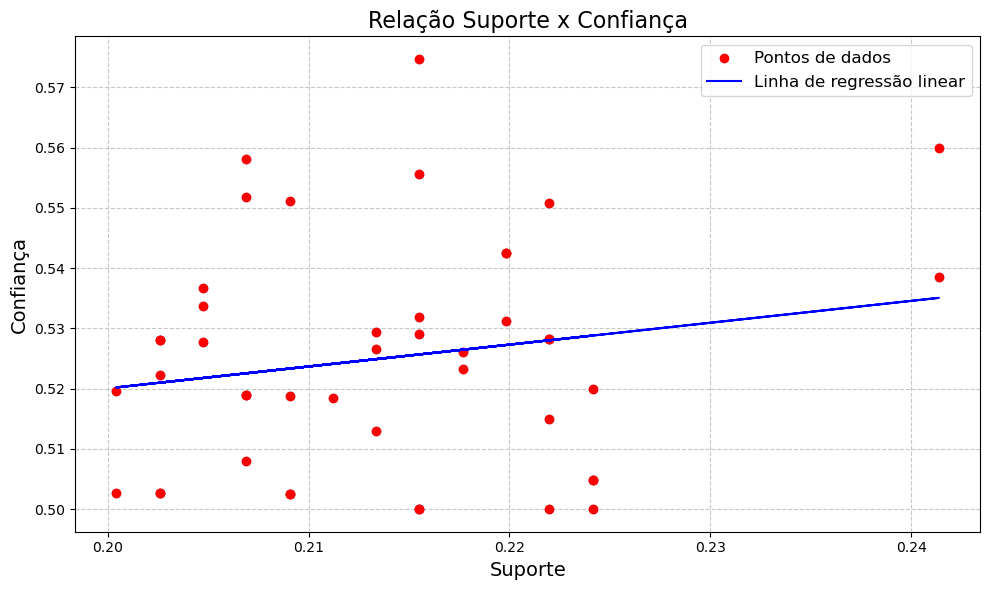

In [42]:
fit = np.polyfit(rules["support"], rules["confidence"], 1)
fit_fn = np.poly1d(fit)

plt.figure(figsize=(10, 6))
plt.plot(rules["support"], rules["confidence"], "ro", label="Pontos de dados")
plt.plot(rules["support"], fit_fn(rules["support"]), 'b-', label="Linha de regressão linear")
plt.scatter(rules["support"], rules["confidence"], alpha=0.5)

plt.xlabel("Suporte", fontsize=14)
plt.ylabel("Confiança", fontsize=14)
plt.title("Relação Suporte x Confiança", fontsize=16)
plt.legend(fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

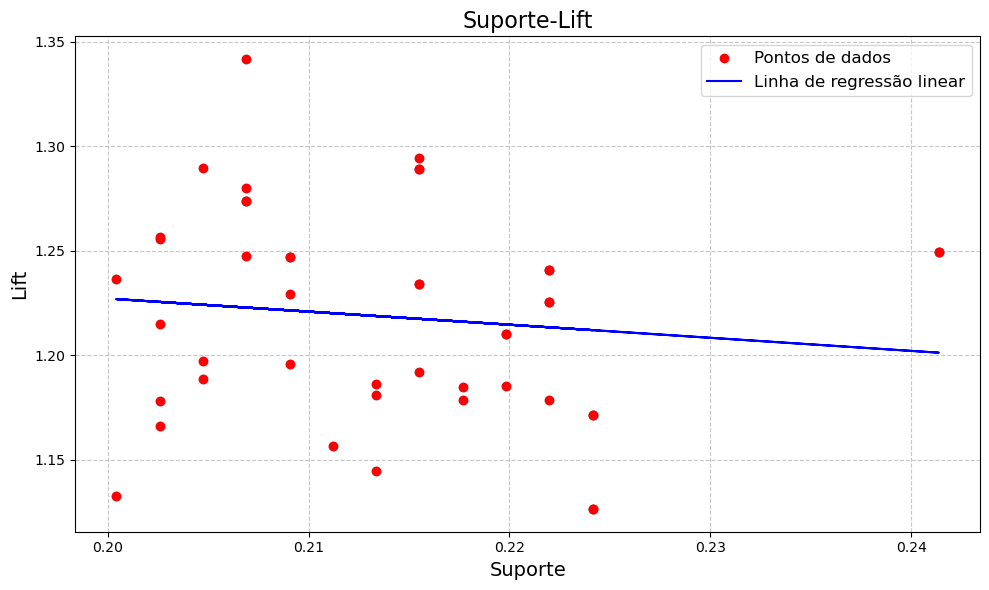

In [43]:
fit = np.polyfit(rules["support"], rules["lift"], 1)
fit_fn = np.poly1d(fit)

plt.figure(figsize=(10, 6))
plt.plot(rules["support"], rules["lift"], "ro", label="Pontos de dados")
plt.plot(rules["support"], fit_fn(rules["support"]), 'b-', label="Linha de regressão linear")
plt.scatter(rules["support"], rules["lift"], alpha=0.5)

plt.xlabel("Suporte", fontsize=14)
plt.ylabel("Lift", fontsize=14)
plt.title("Suporte-Lift", fontsize=16)
plt.legend(fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

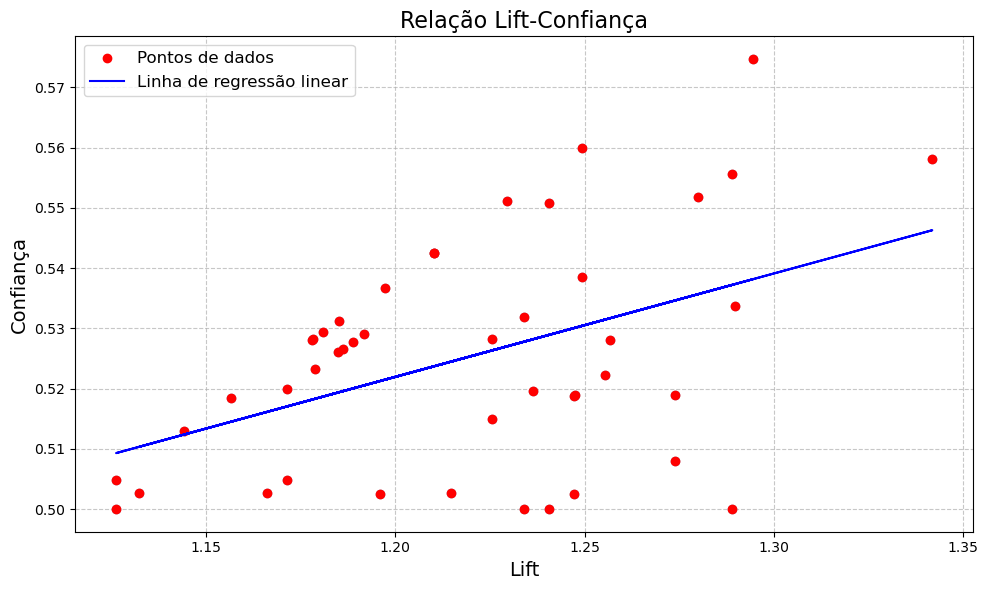

In [44]:
fit = np.polyfit(rules["lift"], rules["confidence"], 1)
fit_fn = np.poly1d(fit)

plt.figure(figsize=(10, 6))
plt.plot(rules["lift"], rules["confidence"], "ro", label="Pontos de dados")
plt.plot(rules["lift"], fit_fn(rules["lift"]), 'b-', label="Linha de regressão linear")
plt.scatter(rules["lift"], rules["confidence"], alpha=0.5)

plt.xlabel("Lift", fontsize=14)
plt.ylabel("Confiança", fontsize=14)
plt.title("Relação Lift-Confiança", fontsize=16)
plt.legend(fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

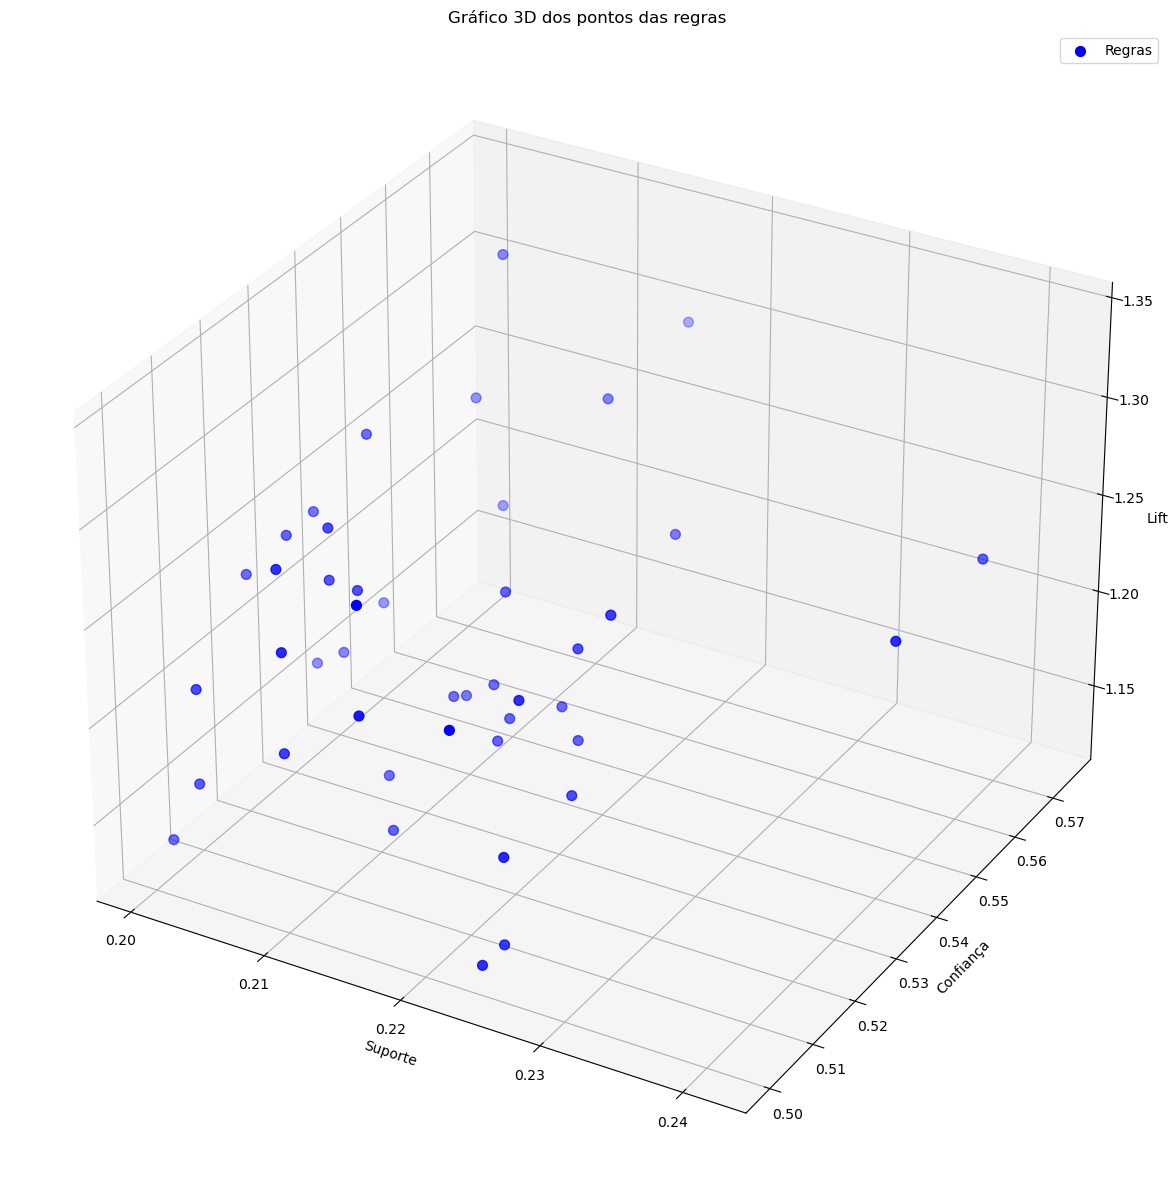

In [47]:
support = rules["support"]
confidence = rules["confidence"]
lift = rules["lift"]

fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(support, confidence, lift, c='b', marker='o', s=50, label='Regras')

ax.set_xlabel('Suporte')
ax.set_ylabel('Confiança')
ax.set_zlabel('Lift')

ax.set_title('Gráfico 3D dos pontos das regras')

ax.grid(True, linestyle='--', alpha=0.6)

ax.legend(loc='upper right')

plt.show()

 <div style="border:#283618 2px solid ; background-color: #FEFAE0; padding: 20px;">
<font face="Pacifico" color="#606C38" size="5"><b>If you find value in this notebook, I would greatly appreciate it if you could consider giving it a like, following me for more updates, and sharing it with others who might also benefit from it.</b></font>

<font face="Pacifico" color="#DDA15E" size="4"><i>Your support means a lot to me and helps me continue sharing insights and knowledge within the Kaggle community.</i></font>

    
<font face="Pacifico" color="#BC6C25" size="4"><b>Thank you!</b></font>
</div>